<center>
<h1> matplotlib with OpenCV</h1>
</center>

### What is matplotlib?
- Matplotlib is a multi-platform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack. 
- It supports many types of plots, such as line plots, bar charts, histograms, scatter plots, contour plots, etc. 
- You can also customize the appearance of your plots with different colors, markers, labels, legends, etc. 
- Matplotlib can also display images using the imshow function, which takes an array of pixel values as input and renders it as a raster image.

## How to use matplotlib with OpenCV in python?
---
- One of the challenges of using matplotlib with OpenCV in python is that they use different color spaces for representing images. 
- Matplotlib uses the RGB (red-green-blue) color space, while OpenCV uses the BGR (blue-green-red) color space. 
- This means that if you try to display an OpenCV image using matplotlib’s imshow function, you will get a distorted color image. 
- To avoid this problem, you need to convert the color space of the image from BGR to RGB using the cvtColor function from OpenCV.
---
- Another challenge is that matplotlib’s imshow function blocks the execution of the code until you close the window that displays the image. - - This means that you cannot display multiple images or update them in real time using matplotlib. 
- To overcome this issue, you can use the ion function from matplotlib to enable interactive mode, which allows you to display multiple images without blocking the code execution. 
- You can also use the draw and pause functions from matplotlib to update the images dynamically.

## What can you do with matplotlib and OpenCV in python?
----


**There are many possibilities of what you can do with matplotlib and OpenCV in python. Here are some examples:**

1. You can create histograms of pixel values or color channels of an image using matplotlib’s hist function and OpenCV’s split function.
---
2. You can apply various filters and transformations to an image using OpenCV’s functions, such as blur, canny, warpAffine, resize, etc., and display the results using matplotlib’s imshow function.
---

3. You can detect faces or other objects in an image using OpenCV’s CascadeClassifier class and detectMultiScale method, and draw bounding boxes around them using matplotlib’s Rectangle class and add_patch method.
---

4. You can extract features from an image using OpenCV’s ORB class and detectAndCompute method, and plot them using matplotlib’s scatter function.
---

5. You can stitch multiple images together to create a panorama using OpenCV’s Stitcher class and stitch method, and display the output using matplotlib’s imshow function.

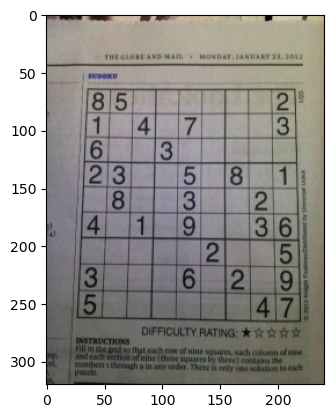

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt 

img = cv.imread('Images/sudoko.jpg')

plt.imshow(img)
plt.show()

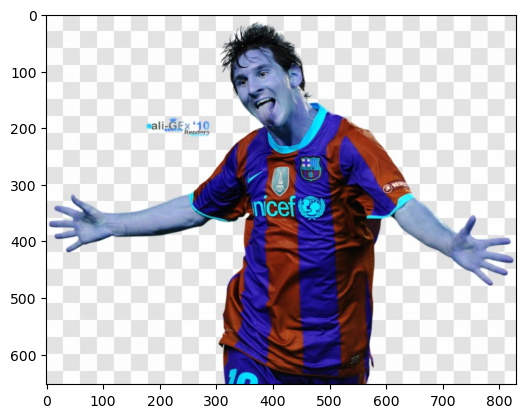

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt 

img = cv.imread('Images/messi1.jpg')

plt.imshow(img)
plt.show()

We can see here the diffrence in the color, the reason for this is Maplotlib reads images in the form of RGB  , where as in cv2 read in BGR fromat

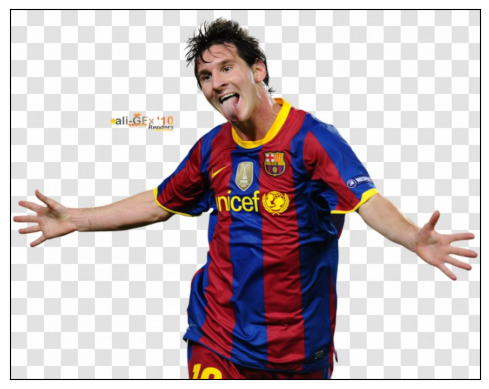

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt 

img = cv.imread('Images/messi1.jpg')

img = cv.cvtColor(img , cv.COLOR_BGR2RGB)
plt.xticks([]) , plt.yticks([])
plt.imshow(img)
plt.show()

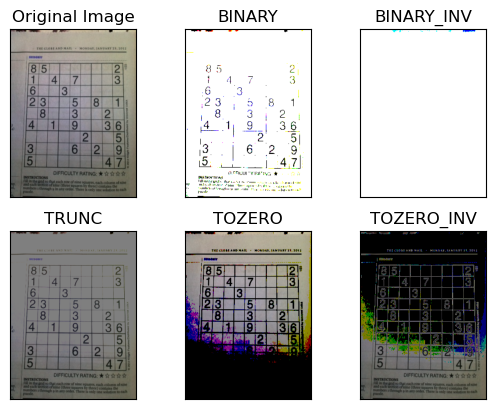

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('Images/sudoko.jpg')
_, th1 = cv.threshold(img, 50, 255, cv.THRESH_BINARY)
_, th2 = cv.threshold(img, 200, 255, cv.THRESH_BINARY_INV)
_, th3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
_, th4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
_, th5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, th1 ,th2 ,th3 ,th4, th5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


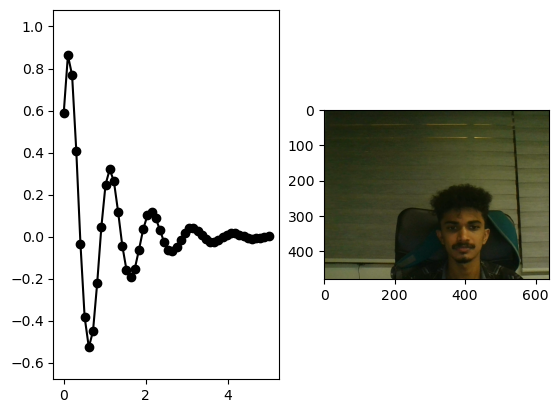

In [ ]:
# import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# enable interactive mode
plt.ion()

# create figure and axes
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1) # left subplot
ax2 = fig.add_subplot(1, 2, 2) # right subplot

# create some random data for plotting
x = np.linspace(0.0, 5.0)
y = np.cos(2 * np.pi * x) * np.exp(-x)

# plot data on left subplot
line1, = ax1.plot(x, y, 'ko-') # so that we can update data later

# open camera using opencv
cap = cv2.VideoCapture(0)

# loop until user presses 'q' key
while True:
    # read frame from camera
    ret, frame = cap.read()

    # convert frame from BGR to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # display frame on right subplot
    ax2.imshow(frame)

    # update data on left subplot
    line1.set_ydata(np.cos(2 * np.pi * (x + i * 3.14 / 2)) * np.exp(-x))

    # redraw the canvas
    fig.canvas.draw()

    # pause for a short time
    plt.pause(0.01)

    # check if user presses 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release camera and close windows
cap.release()
cv2.waitKey(6000)
cv2.destroyAllWindows()
plt.close()


## create histograms of pixel values or color channels of an image

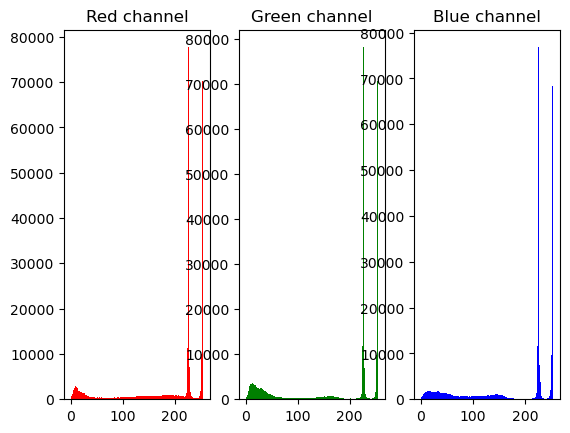

In [7]:
# import libraries
import cv2
import matplotlib.pyplot as plt

# read image using opencv
image = cv2.imread('Images/messi1.jpg')

# convert image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# split image into color channels
r, g, b = cv2.split(image)

# create figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# plot histograms of each color channel
ax1.hist(r.ravel(), bins=256, color='red')
ax1.set_title('Red channel')
ax2.hist(g.ravel(), bins=256, color='green')
ax2.set_title('Green channel')
ax3.hist(b.ravel(), bins=256, color='blue')
ax3.set_title('Blue channel')

# show figure
plt.show()


## Detect faces or other objects in an image

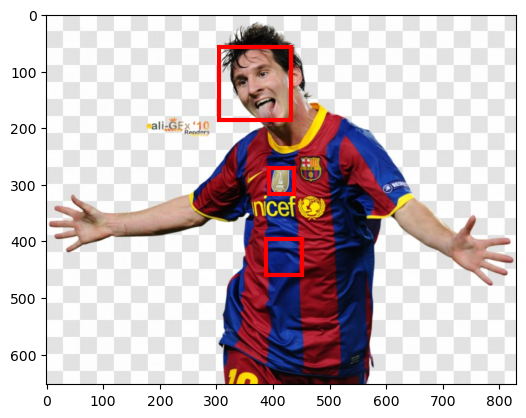

In [12]:
# import libraries
import cv2
import matplotlib.pyplot as plt

# read image using opencv
image = cv2.imread('Images/messi1.jpg')

# convert image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# load face cascade classifier from opencv data folder
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# detect faces in the image using the classifier
faces = face_cascade.detectMultiScale(image)

# draw bounding boxes around the detected faces using matplotlib's Rectangle class and add_patch method
for (x, y, w, h) in faces:
    rect = plt.Rectangle((x, y), w, h, edgecolor='red', facecolor='none', linewidth=3)
    plt.gca().add_patch(rect)

# display image with bounding boxes using matplotlib's imshow function
plt.imshow(image)
plt.show()


## Extract features from an image using OpenCV’s ORB class and detectAndCompute method, and plot them using matplotlib’s scatter function

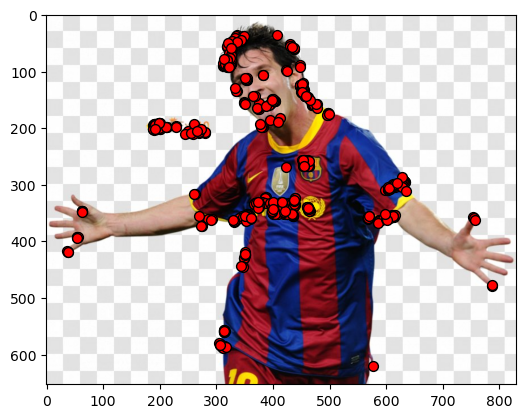

In [13]:
# import libraries
import cv2
import matplotlib.pyplot as plt

# read image using opencv
image = cv2.imread('Images/messi1.jpg')

# convert image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# create ORB object with default parameters
orb = cv2.ORB_create()

# find keypoints and descriptors with ORB using detectAndCompute method
kp, des = orb.detectAndCompute(image, None)

# get the coordinates of the keypoints using pt attribute
x = [p.pt[0] for p in kp]
y = [p.pt[1] for p in kp]

# plot the keypoints using matplotlib's scatter function with red dots and black edges
plt.scatter(x, y, c='red', edgecolors='black', s=50)

# display image with keypoints using matplotlib's imshow function
plt.imshow(image)
plt.show()


## Applications of matplotlib with OpenCV:
----

1. Displaying OpenCV images in different color spaces and formats using matplotlib’s imshow function
2. Matplotlib shows data in different ways, such as lines, bars, circles, etc. You can also change how they look with colors, shapes, words, etc. Matplotlib can also show images as pixels.
3. Applying various filters and transformations to an image using OpenCV’s functions, such as blur, canny, warpAffine, resize, etc., and displaying the results using matplotlib’s imshow function
4. Detecting faces or other objects in an image using OpenCV’s CascadeClassifier class and detectMultiScale method, and drawing bounding boxes around them using matplotlib’s Rectangle class and add_patch method


## You can do many things with matplotlib and OpenCV Here are some examples:
- You can make graphs of how many pixels or colors are in an image using matplotlib’s hist function and OpenCV’s split function.
- You can change how an image looks with different effects using OpenCV’s functions, such as blur, canny, warpAffine, resize, etc., and show the results using matplotlib’s imshow function.
- You can find faces or other things in an image using OpenCV’s CascadeClassifier class and detectMultiScale method, and draw boxes around them using matplotlib’s Rectangle class and add_patch method.
- You can get points from an image that are important or unique using OpenCV’s ORB class and detectAndCompute method, and show them using matplotlib’s scatter function.
- You can join many images together to make a big picture using OpenCV’s Stitcher class and stitch method, and show the result using matplotlib’s imshow function.